In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style('whitegrid')

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV




In [3]:
#import catboost
#from catboost import CatBoostClassifier, Pool, cv

In [4]:
dataTrain = pd.read_csv("data/train.csv")
dataTest = pd.read_csv("data/test.csv")

In [5]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
dataTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df = dataTrain.append(dataTest, ignore_index = True)

/tmp/ipykernel_231891/2920482614.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = dataTrain.append(dataTest, ignore_index = True)


In [9]:
df = pd.DataFrame()

### Survived


In [10]:
titanic_df['Survived'].nunique()

2

In [11]:
titanic_df['Survived'].unique()

array([ 0.,  1., nan])

In [12]:
titanic_df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

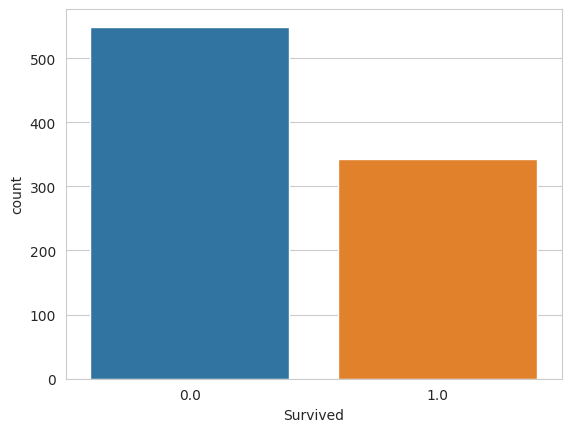

In [13]:
sns.countplot(data = titanic_df, x = 'Survived')

In [14]:
def dataPlot(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
0.0    549
1.0    342
Name: Survived, dtype: int64


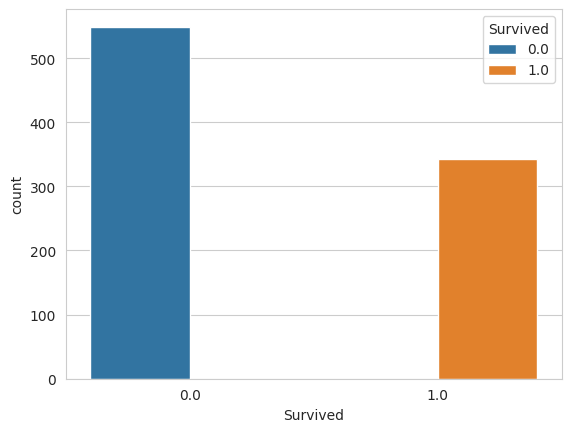

In [15]:
dataPlot(titanic_df, 'Survived', True)

In [16]:
df['Survived'] = titanic_df['Survived']

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


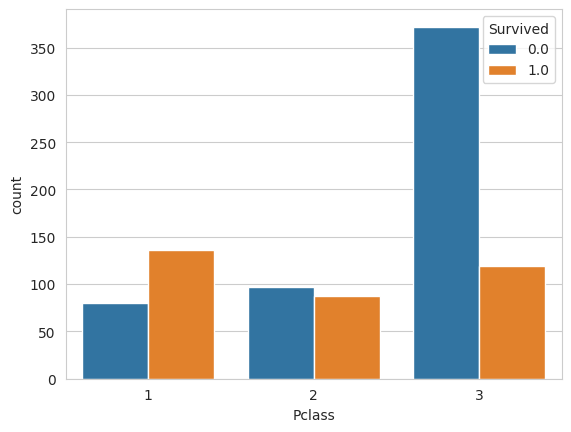

In [17]:
dataPlot(titanic_df, 'Pclass', True)

In [18]:
df['Pclass'] = titanic_df['Pclass']

In [19]:
titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'], [0, 1])

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    843
1    466
Name: Sex, dtype: int64


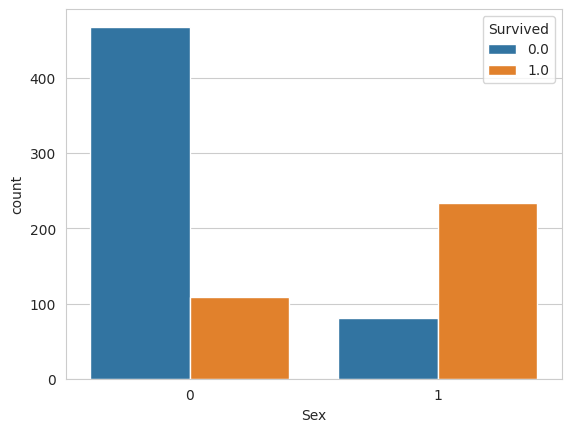

In [20]:
dataPlot(titanic_df, 'Sex', True)

In [21]:
df['Sex'] = titanic_df['Sex']

Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


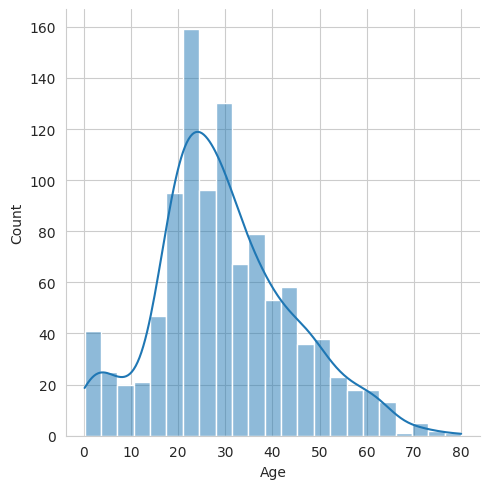

In [22]:
dataPlot(titanic_df, 'Age', False)

In [23]:
titanic_df.corr()

/tmp/ipykernel_231891/3484993026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [24]:
titanic_df[titanic_df['Pclass'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
23,24,1.0,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1295,NaN,1,"Carrau, Mr. Jose Pedro",0,17.0,0,0,113059,47.1000,NaN,S
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,17765,27.7208,D40,C
1298,1299,NaN,1,"Widener, Mr. George Dunton",0,50.0,1,1,113503,211.5000,C80,C
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,C78,Q


In [25]:
for i in sorted(titanic_df['Pclass'].unique()):
    print(i, titanic_df[titanic_df['Pclass'] == i]["Age"].mean())

1 39.15992957746479
2 29.506704980842912
3 24.81636726546906


In [26]:
for i in titanic_df.index:
    if pd.isnull(titanic_df['Age'][i]):
        for j in sorted(titanic_df['Pclass'].unique()):
            print(titanic_df['Age'][i])
            if titanic_df['Pclass'][i] == j:
                titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == j]["Age"].mean())
                print(titanic_df['Age'][i])

/tmp/ipykernel_231891/1889793810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == j]["Age"].mean())


nan
nan
nan
25.0
nan
nan
30.0
30.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
39.0
39.0
39.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
39.0
39.0
39.0
nan
39.0
39.0
39.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
39.0
39.0
39.0
nan
39.0
39.0
39.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
30.0
30.0
nan
39.0
39.0
39.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
39.0
39.0
39.0
nan
nan
nan
25.0
nan
nan
nan
25.0
nan
39.0
39.0
39.0
nan
nan
nan
25.0
nan
nan
30.0
30.0
nan
39.0
39.0
39.0
nan
39.0
39.0
39.0
nan
39.0

In [27]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [28]:
df['Age'] = titanic_df['Age']

### SibSp

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


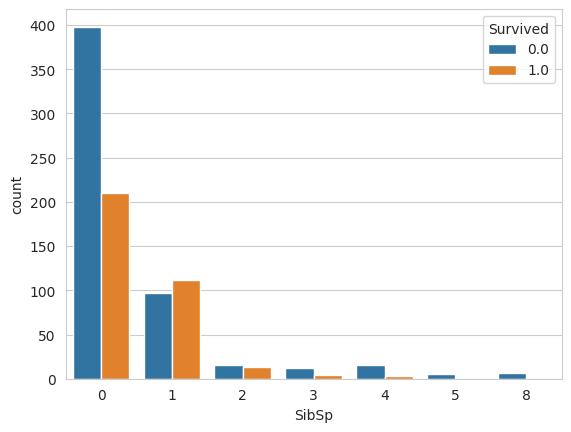

In [29]:
dataPlot(titanic_df, 'SibSp', True)

In [30]:
df['SibSp'] = titanic_df['SibSp']

### Parch

Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


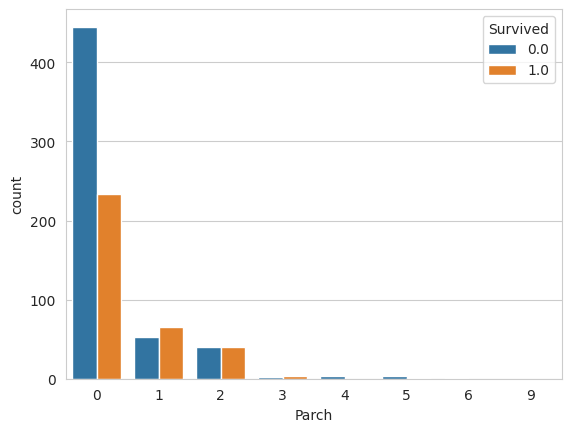

In [31]:
dataPlot(titanic_df, 'Parch', True)

In [32]:
df['Parch'] = titanic_df['Parch']

### FamilySize

In [33]:
titanic_df['FamilySize'] = titanic_df['Parch'] + titanic_df['SibSp'] + 1

In [34]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [35]:
df['FamilySize'] = titanic_df['FamilySize']

### Fare

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

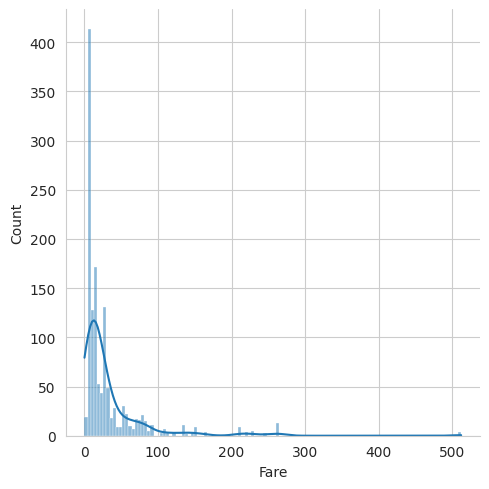

In [36]:
dataPlot(titanic_df, 'Fare', False)

In [37]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,1


In [38]:
titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()

13.302888700564973

In [39]:
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [40]:
titanic_df['Fare'].isnull().sum()

0

In [41]:
df['Fare'] = titanic_df['Fare']

### Embarked

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


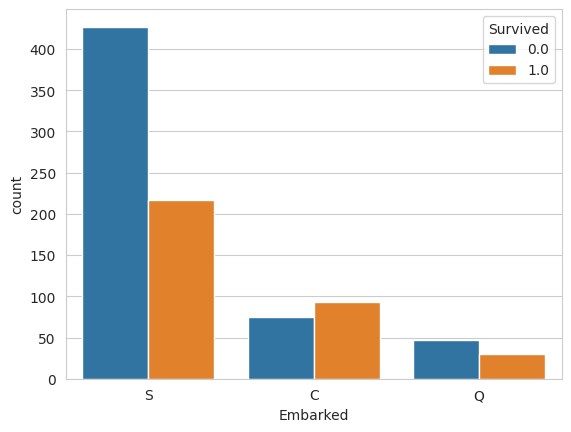

In [42]:
dataPlot(titanic_df, 'Embarked', True)

In [43]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1


In [44]:
for i in titanic_df['Embarked'].unique():
    print(i, titanic_df[titanic_df['Embarked'] == i]["Survived"].mean())
    print(titanic_df[titanic_df['Embarked'] == i]["Pclass"].mean())

S 0.33695652173913043
2.3479212253829322
C 0.5535714285714286
1.8518518518518519
Q 0.38961038961038963
2.894308943089431
nan nan
nan


In [45]:
titanic_df['Embarked'].fillna("C", inplace = True)
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [46]:
df['Embarked'] = titanic_df['Embarked']

### Name

In [47]:
title_list = []
for passenger in range(len(titanic_df)):
    # if  data["Survived"][passenger] == 0:
    a = titanic_df['Name'][passenger]#.split()

    if re.findall(r'\, (.*)\.', a)[0] not in title_list:
        title_list.append(re.findall(r'\, (.*)\.', a)[0])

    # if a[1] not in title_list:
    #     title_list.append(a[1])
title_list

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Mrs. Martin (Elizabeth L',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer',
 'Dona']

In [48]:
#[titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]
titanic_df['Title'] = titanic_df['Name'].apply( lambda name: name.split(',')[1].split('.')[0].strip())

In [49]:
titanic_df['Title'].nunique()

18

In [50]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [51]:
titanic_df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

Quantidade de valores únicos: 18

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']

Quantidade de valores nulos: 0

Quantidade por opção: 
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64


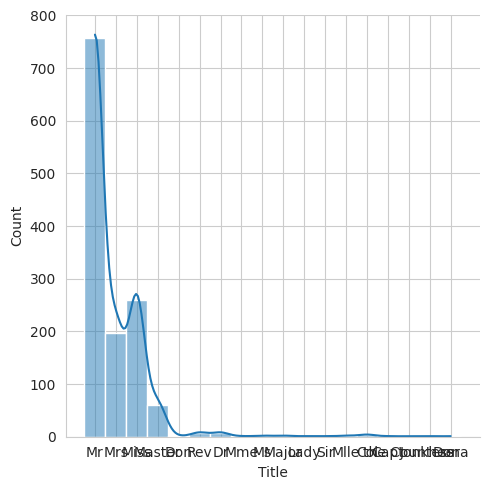

In [52]:
dataPlot(titanic_df, 'Title', False)

In [53]:
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]

Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opção: 
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: Title, dtype: int64


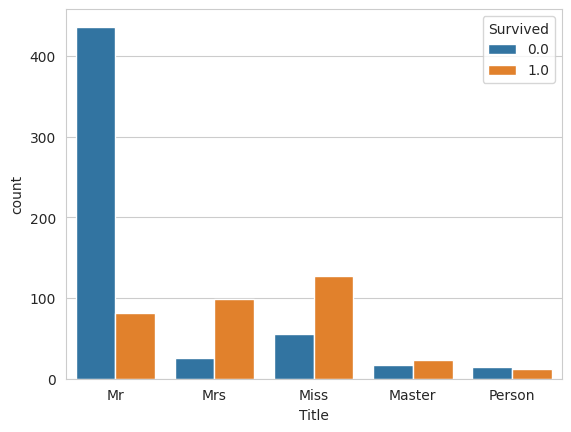

In [54]:
dataPlot(titanic_df, 'Title', True)

In [55]:
df['Title'] = titanic_df['Title']

In [56]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39.0,0,0,1,108.9000,C,Person
1306,NaN,3,0,38.5,0,0,1,7.2500,S,Mr
1307,NaN,3,0,25.0,0,0,1,8.0500,S,Mr


In [57]:
pclass = pd.get_dummies(df['Pclass'], prefix = 'Pclass', drop_first = True)
pclass

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [58]:
title = pd.get_dummies(df['Title'], prefix = 'Title', drop_first = True)
title

,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1304,0,1,0,0
1305,0,0,0,1
1306,0,1,0,0
1307,0,1,0,0


In [59]:
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True)
embarked

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [60]:
titanicdfNew = pd.concat([df, pclass, title, embarked], axis = 1)


In [61]:
titanicdfNew

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr,0,1,0,1,0,0,0,1
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs,0,0,0,0,1,0,0,0
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss,0,1,1,0,0,0,0,1
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs,0,0,0,0,1,0,0,1
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S,Mr,0,1,0,1,0,0,0,1
1305,NaN,1,1,39.0,0,0,1,108.9000,C,Person,0,0,0,0,0,1,0,0
1306,NaN,3,0,38.5,0,0,1,7.2500,S,Mr,0,1,0,1,0,0,0,1
1307,NaN,3,0,25.0,0,0,1,8.0500,S,Mr,0,1,0,1,0,0,0,1


In [62]:
titanicdfNew.drop(['Pclass', 'Title', 'Embarked'], axis = 1, inplace = True)
titanicdfNew

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1.0,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1.0,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
1305,NaN,1,39.0,0,0,1,108.9000,0,0,0,0,0,1,0,0
1306,NaN,0,38.5,0,0,1,7.2500,0,1,0,1,0,0,0,1
1307,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1


In [63]:
train = titanicdfNew[:len(dataTrain)].copy()
test = titanicdfNew[(len(titanic_df) - len(dataTest)):].copy()

In [64]:
train

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1.0,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1.0,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,27.0,0,0,1,13.0000,1,0,0,0,0,1,0,1
887,1.0,1,19.0,0,0,1,30.0000,0,0,1,0,0,0,0,1
888,0.0,1,25.0,1,2,4,23.4500,0,1,1,0,0,0,0,1
889,1.0,0,26.0,0,0,1,30.0000,0,0,0,1,0,0,0,0


In [65]:
test

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
891,NaN,0,34.5,0,0,1,7.8292,0,1,0,1,0,0,1,0
892,NaN,1,47.0,1,0,2,7.0000,0,1,0,0,1,0,0,1
893,NaN,0,62.0,0,0,1,9.6875,1,0,0,1,0,0,1,0
894,NaN,0,27.0,0,0,1,8.6625,0,1,0,1,0,0,0,1
895,NaN,1,22.0,1,1,3,12.2875,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
1305,NaN,1,39.0,0,0,1,108.9000,0,0,0,0,0,1,0,0
1306,NaN,0,38.5,0,0,1,7.2500,0,1,0,1,0,0,0,1
1307,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1


In [66]:
train['Survived'] = train['Survived'].astype(int)

In [67]:
train

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,1,13.0000,1,0,0,0,0,1,0,1
887,1,1,19.0,0,0,1,30.0000,0,0,1,0,0,0,0,1
888,0,1,25.0,1,2,4,23.4500,0,1,1,0,0,0,0,1
889,1,0,26.0,0,0,1,30.0000,0,0,0,1,0,0,0,0


In [68]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [69]:
X_test = test.drop('Survived', axis = 1)

---

In [70]:
def acuracia(algoritmo, X_train, y_train, vc):
    model = algoritmo.fit(X_train, y_train)
    acuracia = round(model.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv= vc, n_jobs = -1)
    acuracia_vs = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vs

In [71]:
# Random Forest
# acc = acuracia 
# rf = random forest
# vc = validação cruzada


acc_rf, acc_vc_rf = acuracia(RandomForestClassifier(), X, y, 10)
print(f"Acurácia: {acc_rf}")
print(f"Acurácia validação cruzada: {acc_vc_rf}")

Acurácia: 98.32
Acurácia validação cruzada: 81.03


In [72]:
# Logistic Regression
# acc = acuracia 
# log = Logistic Regression
# vc = validação cruzada

acc_log, acc_vc_log = acuracia(LogisticRegression(max_iter = 1000), X, y, 10)
print(f"Acurácia: {acc_log}")
print(f"Acurácia validação cruzada: {acc_vc_log}")

Acurácia: 82.94
Acurácia validação cruzada: 82.38


In [74]:
# K-Nearest Neighbours

acc_knn, acc_vc_knn = acuracia(KNeighborsClassifier(), X, y, 10)
print(f"Acurácia: {acc_knn}")
print(f"Acurácia validação cruzada: {acc_vc_knn}")

Acurácia: 80.58
Acurácia validação cruzada: 72.5


In [75]:
# Gaussian Naive Bayes

acc_gaussian, acc_vc_gaussian = acuracia(GaussianNB(), X, y, 10)
print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia validação cruzada: {acc_vc_gaussian}")

Acurácia: 78.79
Acurácia validação cruzada: 78.56


In [76]:
# Linear Support Vector Machines (SVC)

acc_linear_svc, acc_vc_linear_svc = acuracia(LinearSVC(dual = False), X, y, 10)
print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia validação cruzada: {acc_vc_linear_svc}")

Acurácia: 83.28
Acurácia validação cruzada: 82.72


In [77]:
# Stochastic Gradient Descent

acc_sgd, acc_vc_sgd = acuracia(SGDClassifier(), X, y, 10)
print(f"Acurácia: {acc_sgd}")
print(f"Acurácia validação cruzada: {acc_vc_sgd}")

Acurácia: 71.16
Acurácia validação cruzada: 69.47


In [78]:
# Decision Tree Classifiers

acc_dt, acc_vc_dt = acuracia(DecisionTreeClassifier(), X, y, 10)
print(f"Acurácia: {acc_dt}")
print(f"Acurácia validação cruzada: {acc_vc_dt}")

Acurácia: 98.32
Acurácia validação cruzada: 79.46


In [79]:
# Gradient Boost Classifier

acc_gbt, acc_vc_gbt = acuracia(GradientBoostingClassifier(), X, y, 10)
print(f"Acurácia: {acc_gbt}")
print(f"Acurácia validação cruzada: {acc_vc_gbt}")

Acurácia: 89.67
Acurácia validação cruzada: 83.16


---

In [80]:
params = dict(
    max_depth = [n for n in range(1, 5)],
    min_samples_split = [n for n in range(2, 6)],
    min_samples_leaf = [n for n in range(2, 6)],
    n_estimators = [n for n in range(10, 50, 10)],
)

In [81]:
gbc = GradientBoostingClassifier()

In [82]:
gbc_vc = GridSearchCV(estimator = gbc, param_grid = params, cv = 10)

In [83]:
gbc_vc.fit(X, y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [84]:
print(f'Melhor pontuação: {gbc_vc.best_score_}')
print(f'Melhores Parâmetros: {gbc_vc.best_estimator_}')

Melhor pontuação: 0.8485143570536829
Melhores Parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                           n_estimators=30)


In [85]:
gradientBoostingClassifier_pred = gbc_vc.predict(X_test)

In [86]:
kaggle = pd.DataFrame({'PassengerId' : dataTest['PassengerId'], 'Survived' : gradientBoostingClassifier_pred})
kaggle.to_csv('Solution/First.csv', index = False)